<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.project/blob/main/SCM_sub2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
import math

In [2]:
Data = pd.read_excel('과제2_수요예측_데이터.xlsx')

In [3]:
Data['Date'].value_counts() #한날에 수요정보 여러개 있는건 뭐지? 창고다른건 여러개 있다쳐도.

2012-01-10    4
2015-03-18    4
2012-10-01    4
2013-04-24    3
2014-11-25    3
             ..
2014-01-21    1
2013-09-19    1
2014-09-09    1
2014-08-12    1
2012-12-03    1
Name: Date, Length: 469, dtype: int64

In [4]:
Data.describe(), Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_Code      597 non-null    object        
 1   Warehouse         597 non-null    object        
 2   Product_Category  597 non-null    object        
 3   Date              597 non-null    datetime64[ns]
 4   Order_Demand      597 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 23.4+ KB


(       Order_Demand
 count    597.000000
 mean     770.519263
 std     1016.921545
 min        0.000000
 25%      200.000000
 50%      300.000000
 75%     1000.000000
 max     7000.000000, None)

#데이터 전처리

In [5]:
# 수요음수값 발견(train기간만)
Data[Data['Order_Demand']<0] # 입력실수라 가정,+로하거나 빼거나 0으로 하거나.->성능으로 결정

,Product_Code,Warehouse,Product_Category,Date,Order_Demand


In [6]:
Data["Day"]=Data["Date"].dt.dayofweek # 요일
Data['Month'] = Data['Date'].dt.month # 월
Data['year'] = Data['Date'].dt.year # 년도

In [7]:
Data['year_month'] = pd.to_datetime(Data['Date']).dt.to_period('M') # 월별 집계를 위한 년-월 생성

In [8]:
Data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Day,Month,year,year_month
0,Product_0001,Whse_J,Category_005,2011-12-16,200,4,12,2011,2011-12
1,Product_0001,Whse_J,Category_005,2011-12-20,100,1,12,2011,2011-12
2,Product_0001,Whse_A,Category_005,2012-01-03,200,1,1,2012,2012-01
3,Product_0001,Whse_A,Category_005,2012-01-03,800,1,1,2012,2012-01
4,Product_0001,Whse_A,Category_005,2012-01-04,200,2,1,2012,2012-01
...,...,...,...,...,...,...,...,...,...
592,Product_0001,Whse_J,Category_005,2016-12-14,200,2,12,2016,2016-12
593,Product_0001,Whse_A,Category_005,2016-12-15,200,3,12,2016,2016-12
594,Product_0001,Whse_J,Category_005,2016-12-19,500,0,12,2016,2016-12
595,Product_0001,Whse_J,Category_005,2016-12-22,300,3,12,2016,2016-12


In [9]:
Data['Day'].value_counts() # 월~금 평일에만 장사한다.(수요발생)

0    131
3    119
2    116
1    116
4    115
Name: Day, dtype: int64

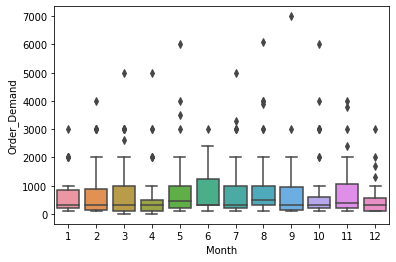

In [40]:
sns.boxplot(x="Month",y="Order_Demand",data=Data)

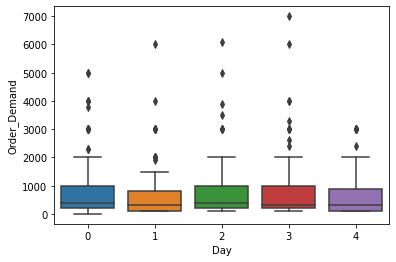

In [41]:
sns.boxplot(x="Day",y="Order_Demand",data=Data)

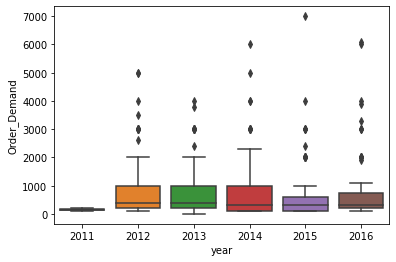

In [34]:
sns.boxplot(x="year",y="Order_Demand",data=Data)

In [10]:
Data.groupby('year_month')['Order_Demand'].mean(),Data.groupby('year_month')['Order_Demand'].count() # 2011년은 2개의 값만 존재.

(year_month
 2011-12     150.000000
 2012-01     646.666667
 2012-02    1000.000000
 2012-03    1084.615385
 2012-04     471.428571
               ...     
 2016-08    1590.909091
 2016-09     471.428571
 2016-10     300.000000
 2016-11     300.000000
 2016-12     283.333333
 Freq: M, Name: Order_Demand, Length: 61, dtype: float64, year_month
 2011-12     2
 2012-01    15
 2012-02    13
 2012-03    13
 2012-04     7
            ..
 2016-08    11
 2016-09     7
 2016-10     7
 2016-11     2
 2016-12     6
 Freq: M, Name: Order_Demand, Length: 61, dtype: int64)

# 분석용 excel Data 생성 및 내보내기

In [11]:
grouped_Data = Data.groupby('year_month')['Order_Demand'].sum()

In [12]:
grouped_Data.describe()

count       61.000000
mean      7540.983607
std       3982.895808
min        300.000000
25%       5000.000000
50%       6900.000000
75%       9700.000000
max      17500.000000
Name: Order_Demand, dtype: float64

In [13]:
grouped_Data

year_month
2011-12      300
2012-01     9700
2012-02    13000
2012-03    14100
2012-04     3300
           ...  
2016-08    17500
2016-09     3300
2016-10     2100
2016-11      600
2016-12     1700
Freq: M, Name: Order_Demand, Length: 61, dtype: int64

In [14]:
#grouped_Data.to_excel("handed_sub2.xlsx") # 년월+수요정보만 있는 excel파일

In [15]:
train, test = Data[Data['year']!=2016], Data[Data['year']==2016]

In [16]:
train_x,train_y = train.loc[:,train.columns!='Order_Demand'], train.loc[:,'Order_Demand']

In [17]:
test_x, test_y = test.loc[:,train.columns!='Order_Demand'], test.loc[:,'Order_Demand']

In [27]:
train_x, train_y

(     Product_Code Warehouse Product_Category  ... Month  year  year_month
 0    Product_0001    Whse_J     Category_005  ...    12  2011     2011-12
 1    Product_0001    Whse_J     Category_005  ...    12  2011     2011-12
 2    Product_0001    Whse_A     Category_005  ...     1  2012     2012-01
 3    Product_0001    Whse_A     Category_005  ...     1  2012     2012-01
 4    Product_0001    Whse_A     Category_005  ...     1  2012     2012-01
 ..            ...       ...              ...  ...   ...   ...         ...
 489  Product_0001    Whse_J     Category_005  ...    12  2015     2015-12
 490  Product_0001    Whse_J     Category_005  ...    12  2015     2015-12
 491  Product_0001    Whse_A     Category_005  ...    12  2015     2015-12
 492  Product_0001    Whse_J     Category_005  ...    12  2015     2015-12
 493  Product_0001    Whse_J     Category_005  ...    12  2015     2015-12
 
 [494 rows x 8 columns], 0       200
 1       100
 2       200
 3       800
 4       200
        .